## Pandas tutorials 

In [333]:
from urllib.request import urlretrieve

In [334]:
url = "https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv"

In [335]:
url

'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

In [336]:
urlretrieve(url, "covid_data.csv")

('covid_data.csv', <http.client.HTTPMessage at 0x75ae0a25b590>)

In [337]:
import pandas as pd

In [338]:
covid_df = pd.read_csv('covid_data.csv')

In [339]:
type(covid_df)

pandas.core.frame.DataFrame

### Basic Information about the data 

In [340]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [341]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [342]:
covid_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [343]:
covid_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [344]:
covid_df.shape

(248, 4)

### Retreving Data from DataFrame 

In [345]:
# Pandas format is simliar to this
covid_data_dict = {
    'date':       ['2020-08-30', '2020-08-31', '2020-09-01', '2020-09-02', '2020-09-03'],
    'new_cases':  [1444, 1365, 996, 975, 1326],
    'new_deaths': [1, 4, 6, 8, 6],
    'new_tests': [53541, 42583, 54395, None, None]
}

In [346]:
covid_data_dict['date']
type(covid_df['new_cases'])

pandas.core.series.Series

In [347]:
covid_df['new_cases'][125]

1389.0

In [348]:
#both are same 
covid_df['new_cases'][125]
covid_df.at[125,'new_cases']

1389.0

In [349]:
cases_df = covid_df[['date','new_cases']]
cases_df

,date,new_cases
0,2019-12-31,0.0
1,2020-01-01,0.0
2,2020-01-02,0.0
3,2020-01-03,0.0
4,2020-01-04,0.0
...,...,...
243,2020-08-30,1444.0
244,2020-08-31,1365.0
245,2020-09-01,996.0
246,2020-09-02,975.0


In [350]:
covid_df_copy = covid_df.copy()


In [351]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [352]:
#loc for accesing the element of a specific row 
covid_df.loc[243]

date          2020-08-30
new_cases         1444.0
new_deaths           1.0
new_tests        53541.0
Name: 243, dtype: object

In [353]:
type(covid_df.loc[243])

pandas.core.series.Series

In [354]:
covid_df.head(3)

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN


In [355]:
covid_df.tail(3)

,date,new_cases,new_deaths,new_tests
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN
247,2020-09-03,1326.0,6.0,NaN


#### Checking the Nan value 

In [356]:
covid_df.at[0,'new_tests']

nan

In [357]:
type(covid_df.at[0,'new_tests'])

numpy.float64

In [358]:
# checking for the startig valid index from the specific column
covid_df.new_tests.first_valid_index()

111

In [359]:
covid_df.loc[107:114]

,date,new_cases,new_deaths,new_tests
107,2020-04-16,2667.0,578.0,NaN
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0


In [360]:
covid_df.sample(10)

,date,new_cases,new_deaths,new_tests
142,2020-05-21,665.0,161.0,40644.0
145,2020-05-24,669.0,119.0,34206.0
221,2020-08-08,552.0,3.0,26631.0
96,2020-04-05,4805.0,681.0,NaN
209,2020-07-27,254.0,5.0,19374.0
230,2020-08-17,477.0,4.0,21379.0
228,2020-08-15,574.0,3.0,25937.0
242,2020-08-29,1460.0,9.0,64294.0
199,2020-07-17,230.0,20.0,28661.0
18,2020-01-18,0.0,0.0,NaN


In [361]:
# new_cases[2]

In [362]:
covid_df['new_cases']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
243    1444.0
244    1365.0
245     996.0
246     975.0
247    1326.0
Name: new_cases, Length: 248, dtype: float64

In [363]:
covid_df["new_cases"][245]

996.0

In [364]:
total_cases= covid_df.new_cases.sum()
total_cases

271515.0

In [365]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [366]:
total_deaths = covid_df.new_deaths.sum()
total_deaths

35497.0

#### overall death rate 

In [367]:
death_rate = covid_df.new_deaths.sum()/ covid_df.new_cases.sum()
death_rate

0.13073679170579894

In [368]:
print("The orveall reported death rate in italy is  {:.5f}%".format(death_rate))

The orveall reported death rate in italy is  0.13074%


### what is the overall number of tests conducted ? a total of 935310 tests were conducted before daily test numbers were being reported 

In [369]:
# if we do the sum then the Nan value always ingnored
covid_df.sum()

date          2019-12-312020-01-012020-01-022020-01-032020-0...
new_cases                                              271515.0
new_deaths                                              35497.0
new_tests                                             4279456.0
dtype: object

In [370]:
initial_tests = 935310
total_tests = initial_tests + covid_df.new_tests.sum()

In [371]:
total_tests

5214766.0

In [372]:
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [373]:
covid_df['new_cases'].sum()

271515.0

In [374]:
covid_df['new_tests'].sum()

4279456.0

In [375]:
covid_df['new_tests'].count()

135

In [376]:
covid_df['date'].count()

248

In [377]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [378]:
covid_df['new_tests'].sum()/ covid_df['new_cases'].sum()

15.761398081137322

### Querying and sorting rows

In [379]:
high_new_cases = covid_df.new_cases >1000

In [380]:
high_new_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [381]:
covid_df[high_new_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [382]:
high_cases_df = covid_df[covid_df.new_cases >1000]
high_cases_df

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [383]:
from IPython.display import display
with pd.option_context('display.max_rows', 100):
    display(covid_df.new_cases > 1000)

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [384]:
positive_rate  =  total_cases/total_tests
positive_rate

0.05206657403227681

In [385]:
high_ratio_df = covid_df[covid_df.new_cases/ covid_df.new_tests >positive_rate]
high_ratio_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
120,2020-04-29,2091.0,382.0,38589.0
123,2020-05-02,1965.0,269.0,31231.0
124,2020-05-03,1900.0,474.0,27047.0


In [386]:
covid_df.new_cases/ covid_df.new_tests

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
243    0.026970
244    0.032055
245    0.018311
246         NaN
247         NaN
Length: 248, dtype: float64

In [387]:
covid_df['positive_rate'] =covid_df.new_cases/ covid_df.new_tests

In [388]:
covid_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [389]:
covid_df.drop(columns=['positive_rate'],inplace= True)


In [390]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [391]:
covid_df.sort_values('new_cases', ascending=False).head()

,date,new_cases,new_deaths,new_tests
82,2020-03-22,6557.0,795.0,NaN
87,2020-03-27,6153.0,660.0,NaN
81,2020-03-21,5986.0,625.0,NaN
89,2020-03-29,5974.0,887.0,NaN
88,2020-03-28,5959.0,971.0,NaN


In [392]:
covid_df.sort_values('new_cases', ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [393]:
covid_df.sort_values('new_deaths', ascending=False).head()

,date,new_cases,new_deaths,new_tests
88,2020-03-28,5959.0,971.0,NaN
89,2020-03-29,5974.0,887.0,NaN
92,2020-04-01,4053.0,839.0,NaN
91,2020-03-31,4050.0,810.0,NaN
82,2020-03-22,6557.0,795.0,NaN


In [394]:
covid_df.sort_values('new_cases').head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [395]:
covid_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [396]:
covid_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


### working with data 

In [397]:
covid_df['date'].head()

0    2019-12-31
1    2020-01-01
2    2020-01-02
3    2020-01-03
4    2020-01-04
Name: date, dtype: object

In [398]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [399]:
covid_df.date

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [400]:
covid_df['year'] = pd.DatetimeIndex(covid_df.date).year

In [401]:
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month

In [402]:
covid_df['day'] = pd.DatetimeIndex(covid_df.date).day

In [403]:
covid_df['weekday'] = pd.DatetimeIndex(covid_df.date).weekday

In [404]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [405]:
# covid_df_may = covid_df[covid_df.month == 5] 
# covid_df_may
covid_df_may = covid_df[covid_df.month == 5]
# covid_df_may.count()
covid_df_may

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [406]:
column = '	new_cases	new_deaths	new_tests	'.split()

In [407]:
column

['new_cases', 'new_deaths', 'new_tests']

In [408]:
covid_df_may_matrics = covid_df_may[column]

In [409]:
covid_df_may_matrics

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [410]:
covid_df_total = covid_df_may_matrics.sum()

In [411]:
covid_df_total

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [412]:
covid_df[covid_df.month == 5][column].sum()

new_cases       29073.0
new_deaths       5658.0
new_tests     1078720.0
dtype: float64

In [413]:
covid_df.new_cases.mean()

1094.8185483870968

In [414]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [415]:
covid_df[covid_df.weekday == 6].new_cases.mean()

1247.2571428571428

In [416]:
column

['new_cases', 'new_deaths', 'new_tests']

### Groupping and aggregation 


In [ ]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

In [417]:
monthy_groups = covid_df.groupby('month')

In [418]:
column

['new_cases', 'new_deaths', 'new_tests']

In [480]:
covid_month_df = monthy_groups[column].sum()

In [481]:
covid_month_df

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,7772.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


In [420]:
weekday_groups = covid_df.groupby('weekday')[column].mean()
weekday_groups

,new_cases,new_deaths,new_tests
weekday,,,
0,1109.142857,124.800000,19826.700000
1,918.638889,129.944444,31166.900000
2,927.305556,144.750000,34665.210526
3,1095.666667,141.472222,34488.578947
4,1189.714286,144.885714,39225.684211
5,1185.800000,157.000000,34589.473684
6,1247.257143,159.457143,28588.105263


In [421]:
weekday_groups['new_deaths']

weekday
0    124.800000
1    129.944444
2    144.750000
3    141.472222
4    144.885714
5    157.000000
6    159.457143
Name: new_deaths, dtype: float64

In [422]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()

In [423]:
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()

In [424]:
covid_df['total_tests'] = covid_df.new_tests.cumsum() +initial_tests

In [425]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN


### Merging data from multiple sources

In [426]:
from urllib.request import urlretrieve
url2 = 'https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv' 

In [427]:
urlretrieve(url2,'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x75ae0a25d130>)

In [428]:
location_df = pd.read_csv('locations.csv')

In [429]:
location_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


In [430]:
location_df[location_df.location== 'Italy']

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [431]:
covid_df['location'] = "Italy"

In [432]:
covid_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6,266853.0,35473.0,5117788.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0,268218.0,35477.0,5160371.0,Italy
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1,269214.0,35483.0,5214766.0,Italy
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2,270189.0,35491.0,NaN,Italy


In [433]:
merged_df = covid_df.merge(location_df, on ='location')

In [434]:
merged_df.head(5)

,date,new_cases,new_deaths,new_tests,year,month,day,weekday,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [435]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population

In [436]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [438]:
merged_df['tests_per_million'] = merged_df.total_tests * 1e6 / merged_df.population


In [ ]:
merged_df

### Writing data back to file 

In [439]:
result_df = merged_df[[ 
                        'date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests', 
                       'cases_per_million', 
                       'deaths_per_million', 
                       'tests_per_million'
                    ]]

In [440]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,4468.753409,586.998461,NaN


In [442]:
#save to csv

result_df.to_csv('result_df.csv', index=False)

### Basic Plotting with pandas 

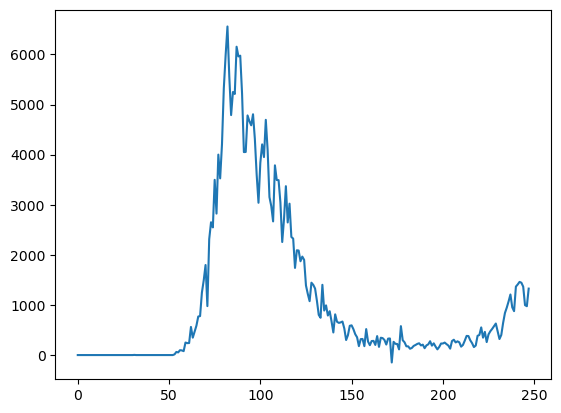

In [446]:
result_df.new_cases.plot();

In [ ]:
result_df.set_index('date', inplace=True)

KeyError: "None of ['date'] are in the columns"

In [449]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million,tests_per_million
date,,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,5117788.0,4413.578101,586.700753,84644.943252
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,5160371.0,4436.154329,586.766910,85349.238862
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,5214766.0,4452.627532,586.866146,86248.897403


In [454]:
result_df.loc['2020-09-01']


new_cases             9.960000e+02
total_cases           2.692140e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           5.214766e+06
cases_per_million     4.452628e+03
deaths_per_million    5.868661e+02
tests_per_million     8.624890e+04
Name: 2020-09-01 00:00:00, dtype: float64

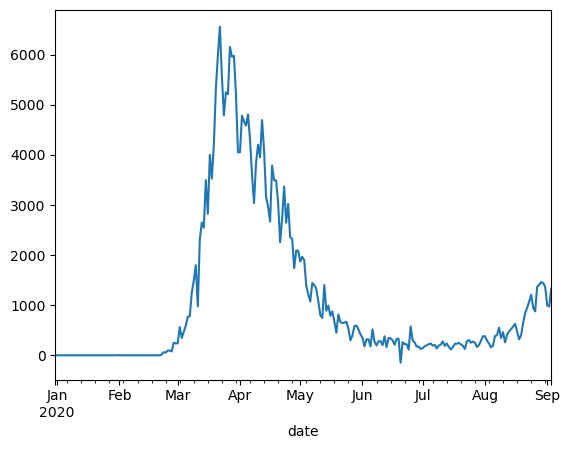

In [455]:
result_df.new_cases.plot();

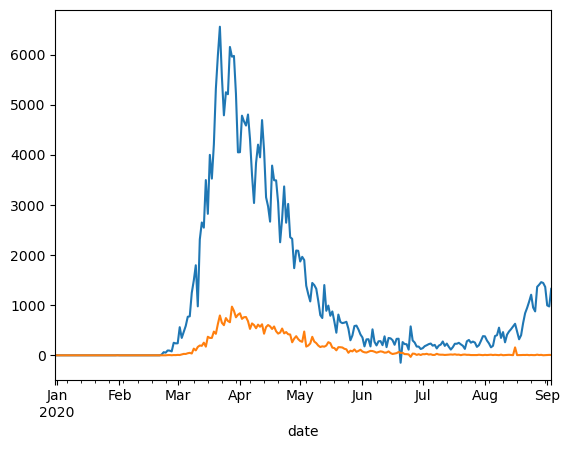

In [460]:
# combining two plots

result_df.new_cases.plot();
result_df.new_deaths.plot();
# result_df.new_tests.plot()

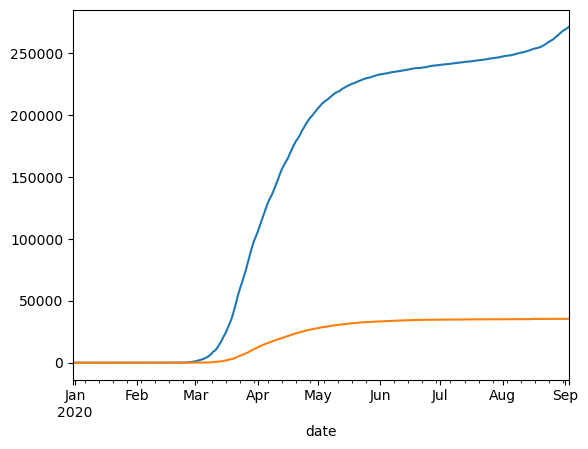

In [464]:
result_df.total_cases.plot();
result_df.total_deaths.plot();


In [465]:
death_rate = result_df.total_deaths/result_df.total_cases

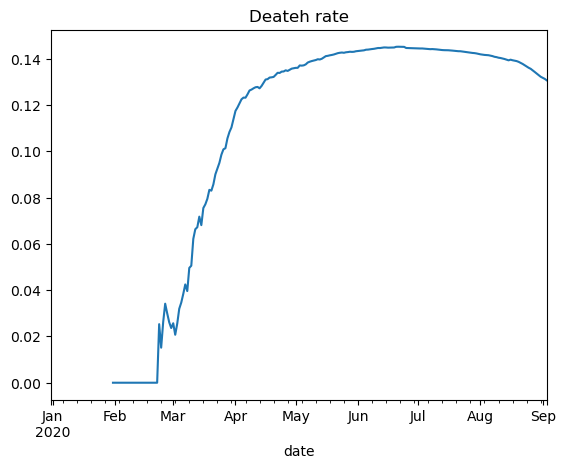

In [467]:
death_rate.plot(title="Deateh rate");

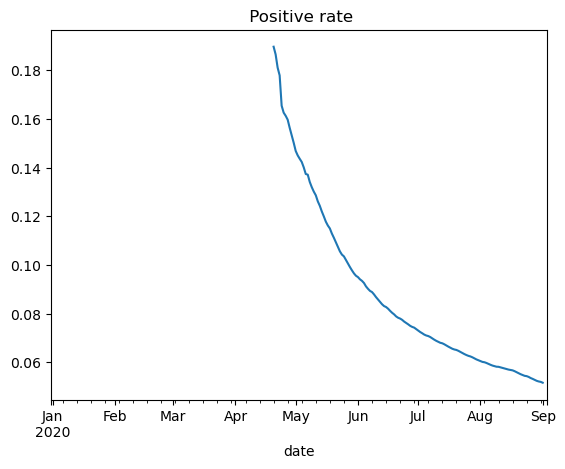

In [470]:
positive_rate = result_df.total_cases/result_df.total_tests
positive_rate.plot(title= " Positive rate");

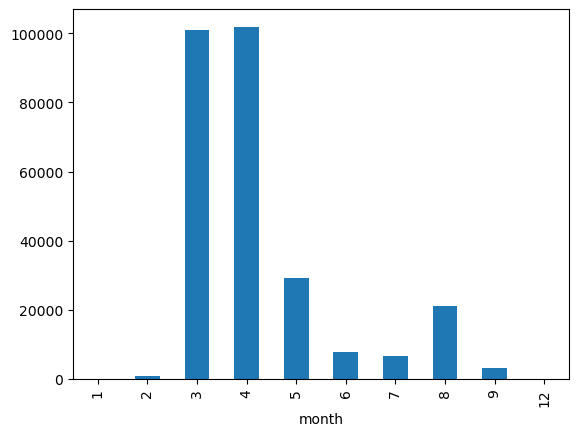

In [483]:
covid_month_df.new_cases.plot(kind='bar');

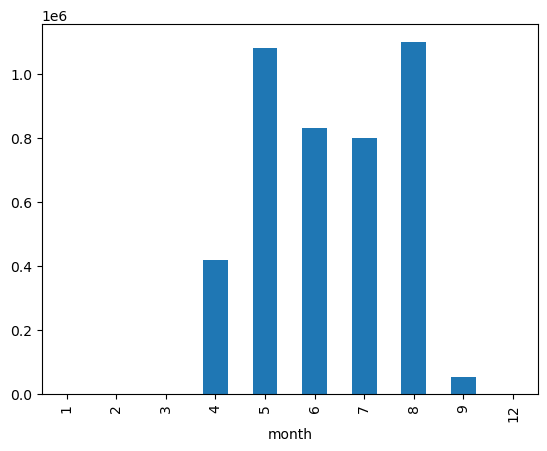

In [484]:
covid_month_df.new_tests.plot(kind='bar');

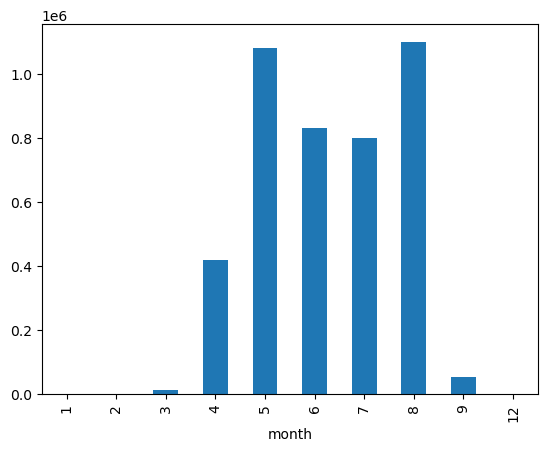

In [492]:
covid_month_df.new_deaths.plot(kind='bar');
covid_month_df.new_tests.plot(kind='bar');